In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os, time

In [4]:
img = cv2.imread('index.jpeg') 
img1 = cv2.imread('index.jpeg') 

# returns an array of Blue, Green, Red values
impx=img[100,100]
print(impx)

#returns the  Blue values
impxb=img[100,100,0]
print(impxb)

#modify the pixel value of my image
#img[100,100]=[0,0,0]
print(img[100,100])

In [4]:
# accessing RED value
img.item(100,100,2)

255

In [5]:
#modifying the red value
#img.itemset((100,100,2),25)
print(img.item(100,100,2))

255


In [6]:
#image properties
print(img.shape)
#total number of pixel
print(img.size)
#image data type
print(img.dtype)

(1080, 810, 3)
2624400
uint8


In [7]:
#img[:,:,1] = 22

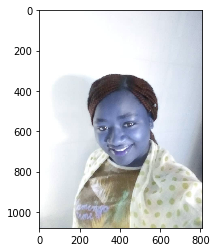

In [8]:
plt.imshow(img)

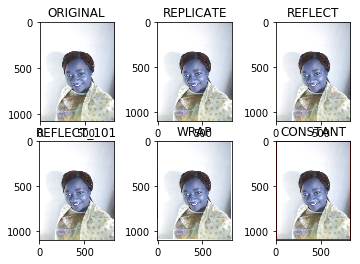

In [9]:
BLUE=[255,0,0]
replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

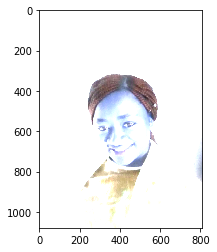

In [10]:
#cv2 additiom
plt.imshow(cv2.add(img,img1))

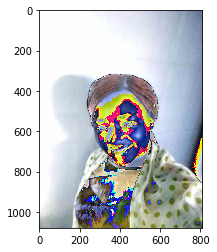

In [11]:
#Numpy addition
plt.imshow(img+img1)

In [12]:
#There is a difference between OpenCV addition and Numpy addition. 
#OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

(259, 460, 3) (240, 195, 3)


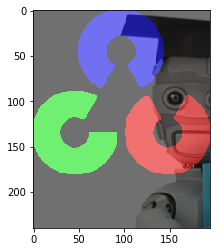

In [13]:
ml   = cv2.imread('ml.png')
#frog   = cv2.imread('ml.png')
frog = cv2.imread('opencv-logo.png')
print(ml.shape,frog.shape)
min_r, min_c = (min(ml.shape[0], frog.shape[0]), 
                min(ml.shape[1], frog.shape[1]))

dst=cv2.addWeighted(ml[:min_r, :min_c], 0.4,
                      frog[:min_r, :min_c], 0.5, 10)
plt.imshow(dst)
# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Create a slide show of images in a folder with smooth transition between images using cv2.addWeighted function

In [8]:
__author__ = 'abitran'

# first we define the folder that contains the images
my_folder = 'album'

# we create a blank image of the same dimension as the images inside de folder
imgfirst = np.zeros((1080, 810,3), np.uint8)

# we define the location of the folder
my_location = "./"+ my_folder

# we loop through the files inside the folder
for file in os.listdir(my_location):

# we read a file    
    img = cv2.imread(my_location + '/' + file)

# blending formula from cv2 docs:
# dst = alpha*img1 + beta*img2 + gamma, where gamma = 0

# we create a loop from 1-10 (including 10) to apply alpha 
    for alpha in range(1, 11):

# we divide alpha by 10 to create a float
        alpha = alpha/10.0
# to create a transition effect, beta must be:
        beta = 1 - alpha
# we load the transition into the image canvas
        cv2.imshow('album', cv2.addWeighted(img, alpha, imgfirst, beta, 0.0))
        time.sleep(0.1)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    if cv2.waitKey(5) & 0xff == ord('q'):
        break
# we assign the img to the first one
    imgfirst = img
     
cv2.destroyAllWindows()

In [14]:
e1 = cv2.getTickCount()
# your code execution
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()

In [16]:
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print (t)

1.411457797


In [17]:
cv2.useOptimized() 

True

In [19]:
 %timeit res = cv2.medianBlur(img,49)

10 loops, best of 5: 62.5 ms per loop


In [21]:
x = 5
%timeit y=x**2

The slowest run took 8.80 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 155 ns per loop


In [22]:
%timeit y=x*x

10000000 loops, best of 5: 34.4 ns per loop


In [24]:
z = np.uint8([5])
%timeit y=z*z

The slowest run took 36.48 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 335 ns per loop


In [25]:
%timeit y=np.square(z)

The slowest run took 31.76 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 345 ns per loop


Changing Colorspaces


In [28]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
#print(flags)

In [35]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

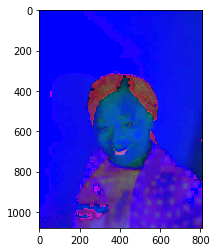

In [36]:
plt.imshow(img)

In [ ]:
cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    
    lower_red = np.array([15,0,0])
    upper_red = np.array([36, 255, 255])
    
    lower_green = np.array([15,0,0])
    upper_green = np.array([36, 255, 255])

    # Threshold the HSV image to get only blue colors
    mask1 = cv2.inRange(hsv, lower_blue, upper_blue)
    mask2 = cv2.inRange(hsv, lower_red, upper_red)
    mask3 = cv2.inRange(hsv, lower_green, upper_green)
    # Bitwise-AND mask and original image
    mask = cv2.bitwise_or(mask1, mask2,mask2)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
   

cv2.destroyAllWindows()

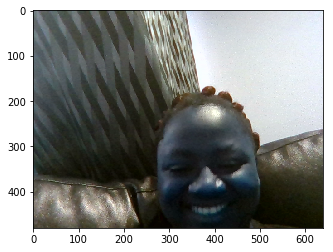

In [2]:
cap = cv2.VideoCapture(0)
_,my_face=cap.read()
print()
plt.imshow(my_face)


In [4]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print (hsv_green)

[[[ 60 255 255]]]


Exercises
Try to find a way to extract more than one colored objects, for eg, extract red, blue, green objects simultaneously.
